In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [21]:
dataset =  {
    'X': [331, 462, 487, 493, 559, 573, 639, 774, 852, 882, 987, 1029, 1030, 1047, 1050, 1109, 1128, 1144, 1158, 1181, 1203, 1252, 1288, 1372, 1377, 1380, 1511, 1608, 1626, 1640, 1805, 1894, 1950, 1962, 2032, 2062, 2123, 2168, 2198, 2215, 2237, 2300, 2332, 2397, 2439, 2611, 2721, 2847, 2909, 2992],
    'Y': [302, 307, 371, 440, 470, 509, 513, 600, 682, 811, 819, 933, 982, 1018, 1029, 1064, 1067, 1086, 1111, 1135, 1138, 1160, 1172, 1280, 1369, 1497, 1507, 1577, 1633, 1781, 1832, 1912, 2040, 2144, 2219, 2254, 2277, 2303, 2564, 2582, 2673, 2807, 2870, 2890, 2914, 2925, 2932, 2975, 2983, 2996]
}

df = pd.DataFrame (dataset)


In [8]:
df.describe()


,Y,X
count,50.000000,50.000000
mean,1609.100000,1547.320000
std,877.218848,723.285713
min,302.000000,331.000000
25%,991.000000,1034.250000
50%,1433.000000,1378.500000
75%,2296.500000,2156.750000
max,2996.000000,2992.000000


Inicio da plotagem de gráficos para analise

<AxesSubplot:title={'center':'Boxplot'}, xlabel='R$'>

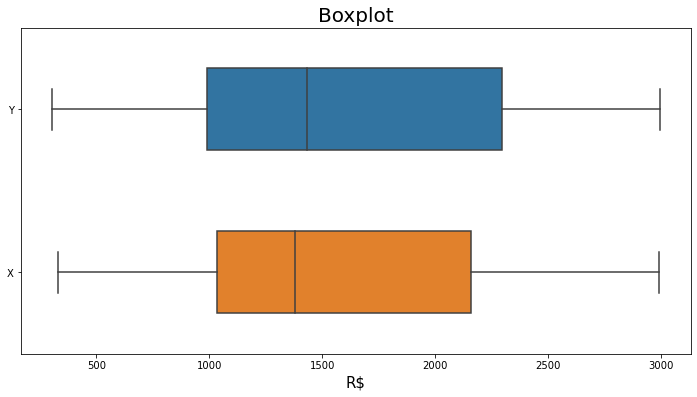

In [9]:
ax = sb.boxplot(data=df, orient='h',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot',fontsize=20)
ax.set_xlabel('R$',fontsize=15)
ax

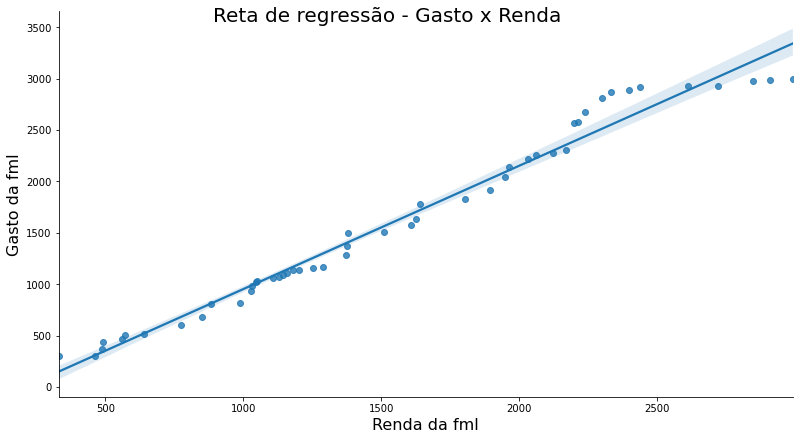

In [12]:
ax = sb.lmplot(data=df, x='X',y='Y')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de regressão - Gasto x Renda", fontsize=20)
ax.set_xlabels("Renda da fml", fontsize=16)
ax.set_ylabels("Gasto da fml", fontsize=16)

In [13]:
df.cov()

,Y,X
Y,769512.908163,627336.906122
X,627336.906122,523142.222041


In [15]:
import statsmodels.api as sm
y = df.Y
x = sm.add_constant(df.X)

x.head

<bound method NDFrame.head of     const     X
0     1.0   331
1     1.0   462
2     1.0   487
3     1.0   493
4     1.0   559
5     1.0   573
6     1.0   639
7     1.0   774
8     1.0   852
9     1.0   882
10    1.0   987
11    1.0  1029
12    1.0  1030
13    1.0  1047
14    1.0  1050
15    1.0  1109
16    1.0  1128
17    1.0  1144
18    1.0  1158
19    1.0  1181
20    1.0  1203
21    1.0  1252
22    1.0  1288
23    1.0  1372
24    1.0  1377
25    1.0  1380
26    1.0  1511
27    1.0  1608
28    1.0  1626
29    1.0  1640
30    1.0  1805
31    1.0  1894
32    1.0  1950
33    1.0  1962
34    1.0  2032
35    1.0  2062
36    1.0  2123
37    1.0  2168
38    1.0  2198
39    1.0  2215
40    1.0  2237
41    1.0  2300
42    1.0  2332
43    1.0  2397
44    1.0  2439
45    1.0  2611
46    1.0  2721
47    1.0  2847
48    1.0  2909
49    1.0  2992>

In [17]:
mod_reg = sm.OLS(y,x).fit()
mod_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2096.
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.92e-41
Time:                        20:56:43   Log-Likelihood:                -314.30
No. Observations:                  50   AIC:                             632.6
Df Residuals:                      48   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.4010     44.659     -5.517      0.000    -336.194    -156.608
X              1.1992      0.026     45.781      0.000       1.147       1.252
==============================================================================
Omnibus:                        3.230   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.214
Skew:                           0.370   Prob(JB):                        0.330
Kurtosis:                       3.718   Cond. No.                     4.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Obtendo previsões dentro dad amostra

In [19]:
df['Y_pred'] = mod_reg.predict()

In [20]:
df

,Y,X,Y_pred
0,302,331,150.524505
1,307,462,307.615887
2,371,487,337.595158
3,440,493,344.790183
4,470,559,423.935460
5,509,573,440.723852
6,513,639,519.869128
7,600,774,681.757194
8,682,852,775.292521
9,811,882,811.267646
